In [17]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from dbio3 import load_data
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Mecab
mecab = Mecab()

In [15]:
df = pd.read_csv("./data/fintech_news3.csv")
df

,날짜,제목,원문링크,뉴스본문
0,2025-11-19,"한국핀테크지원센터, ‘제18회 대한민국소통어워즈’에서 2년 연속 3개 부문 대상 수상",https://www.joongang.co.kr/article/25383037,NaN
1,2025-11-19,[한국핀테크지원센터] 2025 핀테크 전문가(개발자) 과정 ‘FinBoost Aca...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...
2,2025-11-19,[한국핀테크산업협회] 네트워킹 행사 '핀테크 커넥팅 데이 2025' 개최(11.26...,https://fintech.or.kr/web/board/boardContentsV...,"안녕하세요. 핀테크산업협회 사무국입니다.협회는 핀테크 기업과 금융기관, AFA 등 ..."
3,2025-11-19,[한국핀테크지원센터] (온라인) 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요. 한국핀테크지원센터입니다.2025년 금융특화 계층별 AI역량강화 과정 ‘...
4,2025-11-19,[한국핀테크지원센터] 2025년 핀테크기업 온라인 채용관 (사람인 saramin) ...,https://fintech.or.kr/web/board/boardContentsV...,2025년‘핀테크기업 온라인 채용관’ (사람인 saramin) 참여 기업 모집 ...
...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제... “몰락 중산층 2000만명 우버 택시로 몰렸다”,https://n.news.naver.com/mnews/article/023/000...,"\n\n[온차이나]중국 민간 경제 전문가들 “통계보다 훨씬 더 나쁘고, 성장시대 ..."
11747,2024-12-16,"""관세 폭탄 때문에 내년엔 더 비싸""…생필품·가전 등 사재기 열풍 부는 美",https://n.news.naver.com/mnews/article/277/000...,"\n\nWSJ ""사재기가 인플레이션 부추길 수도"" 지적미국의 일부 소비자들이 도널드..."
11748,2024-12-16,"구글·메타 등과 AI칩 합작… 브로드컴, 엔비디아 대항마로",https://n.news.naver.com/mnews/article/023/000...,\n\n시총도 1조달러 돌파\n\n\n\n\t\t\t\t\t\t\t\t\t\t미국 ...
11749,2024-12-16,"美, 중국의 중동·동남아 통한 AI 반도체 우회 조달도 막는다",https://n.news.naver.com/mnews/article/023/000...,\n\n수출 물량 상한제 추진\t\t\t\t\t\t\t미국 정부가 국가 안보를 이유...


In [18]:
def text_clean(x):
    # 한글, 영문대소문자, 숫자만 남기고 모두 제거
    cleaned = re.sub(r'[^가-힣a-zA-Z0-9]', " ", x)
    cleaned = cleaned.replace("  ", " ").replace("  ", " ").strip()
    return cleaned

In [19]:
df = df.dropna()
df

,날짜,제목,원문링크,뉴스본문
1,2025-11-19,[한국핀테크지원센터] 2025 핀테크 전문가(개발자) 과정 ‘FinBoost Aca...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...
2,2025-11-19,[한국핀테크산업협회] 네트워킹 행사 '핀테크 커넥팅 데이 2025' 개최(11.26...,https://fintech.or.kr/web/board/boardContentsV...,"안녕하세요. 핀테크산업협회 사무국입니다.협회는 핀테크 기업과 금융기관, AFA 등 ..."
3,2025-11-19,[한국핀테크지원센터] (온라인) 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요. 한국핀테크지원센터입니다.2025년 금융특화 계층별 AI역량강화 과정 ‘...
4,2025-11-19,[한국핀테크지원센터] 2025년 핀테크기업 온라인 채용관 (사람인 saramin) ...,https://fintech.or.kr/web/board/boardContentsV...,2025년‘핀테크기업 온라인 채용관’ (사람인 saramin) 참여 기업 모집 ...
5,2025-11-19,"금융위, 5대 금융지주 불러모아 “포용금융 적극 역할” 당부",https://n.news.naver.com/mnews/article/016/000...,"\n\n‘포용금융 소통·점검회의’ 개최기관별 지원현황, 준비상황 점검\n\n\n\n..."
...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제... “몰락 중산층 2000만명 우버 택시로 몰렸다”,https://n.news.naver.com/mnews/article/023/000...,"\n\n[온차이나]중국 민간 경제 전문가들 “통계보다 훨씬 더 나쁘고, 성장시대 ..."
11747,2024-12-16,"""관세 폭탄 때문에 내년엔 더 비싸""…생필품·가전 등 사재기 열풍 부는 美",https://n.news.naver.com/mnews/article/277/000...,"\n\nWSJ ""사재기가 인플레이션 부추길 수도"" 지적미국의 일부 소비자들이 도널드..."
11748,2024-12-16,"구글·메타 등과 AI칩 합작… 브로드컴, 엔비디아 대항마로",https://n.news.naver.com/mnews/article/023/000...,\n\n시총도 1조달러 돌파\n\n\n\n\t\t\t\t\t\t\t\t\t\t미국 ...
11749,2024-12-16,"美, 중국의 중동·동남아 통한 AI 반도체 우회 조달도 막는다",https://n.news.naver.com/mnews/article/023/000...,\n\n수출 물량 상한제 추진\t\t\t\t\t\t\t미국 정부가 국가 안보를 이유...


In [21]:
df.loc[:, '제목'] = df['제목'].apply(text_clean)

In [22]:
df.loc[:, '뉴스본문'] = df['뉴스본문'].apply(text_clean)

In [23]:
df

,날짜,제목,원문링크,뉴스본문
1,2025-11-19,한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...
2,2025-11-19,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 핀테크산업협회 사무국입니다 협회는 핀테크 기업과 금융기관 AFA 등 해외...
3,2025-11-19,한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 한국핀테크지원센터입니다 2025년 금융특화 계층별 AI역량강화 과정 핀테...
4,2025-11-19,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...,https://fintech.or.kr/web/board/boardContentsV...,2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기업 모집 한국핀테크...
5,2025-11-19,금융위 5대 금융지주 불러모아 포용금융 적극 역할 당부,https://n.news.naver.com/mnews/article/016/000...,포용금융 소통 점검회의 개최기관별 지원현황 준비상황 점검 금융위원회 제공 헤럴드경...
...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제 몰락 중산층 2000만명 우버 택시로 몰렸다,https://n.news.naver.com/mnews/article/023/000...,온차이나 중국 민간 경제 전문가들 통계보다 훨씬 더 나쁘고 성장시대 저문다 경고 연...
11747,2024-12-16,관세 폭탄 때문에 내년엔 더 비싸 생필품 가전 등 사재기 열풍 부는,https://n.news.naver.com/mnews/article/277/000...,WSJ 사재기가 인플레이션 부추길 수도 지적미국의 일부 소비자들이 도널드 트럼프 미...
11748,2024-12-16,구글 메타 등과 AI칩 합작 브로드컴 엔비디아 대항마로,https://n.news.naver.com/mnews/article/023/000...,시총도 1조달러 돌파 미국 반도체 기업 브로드컴이 13일 처음으로 시가총액 이...
11749,2024-12-16,중국의 중동 동남아 통한 AI 반도체 우회 조달도 막는다,https://n.news.naver.com/mnews/article/023/000...,수출 물량 상한제 추진 미국 정부가 국가 안보를 이유로 특정 국가들에 인공지능 A...


In [25]:
df['tokens'] = df['뉴스본문'].apply(mecab.nouns)
df

/tmp/ipykernel_924/3460636742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['뉴스본문'].apply(mecab.nouns)


,날짜,제목,원문링크,뉴스본문,tokens
1,2025-11-19,한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...,"[한국, 핀테크, 지원, 센터, 핀테크, 산업, 성장, 기여, 최신, 트렌드, 반영..."
2,2025-11-19,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 핀테크산업협회 사무국입니다 협회는 핀테크 기업과 금융기관 AFA 등 해외...,"[안녕, 핀테크, 산업, 협회, 사무국, 협회, 핀테크, 기업, 금융, 기관, 등,..."
3,2025-11-19,한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 한국핀테크지원센터입니다 2025년 금융특화 계층별 AI역량강화 과정 핀테...,"[안녕, 한국, 핀테크, 지원, 센터, 년, 금융, 특화, 계층, 역량, 강화, 과..."
4,2025-11-19,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...,https://fintech.or.kr/web/board/boardContentsV...,2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기업 모집 한국핀테크...,"[년, 핀테크, 기업, 온라인, 용관, 사람, 참여, 기업, 모집, 한국, 핀테크,..."
5,2025-11-19,금융위 5대 금융지주 불러모아 포용금융 적극 역할 당부,https://n.news.naver.com/mnews/article/016/000...,포용금융 소통 점검회의 개최기관별 지원현황 준비상황 점검 금융위원회 제공 헤럴드경...,"[포용, 금융, 소통, 점검, 회의, 개최, 기관, 지원, 현황, 준비, 상황, 점..."
...,...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제 몰락 중산층 2000만명 우버 택시로 몰렸다,https://n.news.naver.com/mnews/article/023/000...,온차이나 중국 민간 경제 전문가들 통계보다 훨씬 더 나쁘고 성장시대 저문다 경고 연...,"[온차, 중국, 민간, 경제, 전문가, 통계, 성장, 시대, 경고, 연간, 장률, ..."
11747,2024-12-16,관세 폭탄 때문에 내년엔 더 비싸 생필품 가전 등 사재기 열풍 부는,https://n.news.naver.com/mnews/article/277/000...,WSJ 사재기가 인플레이션 부추길 수도 지적미국의 일부 소비자들이 도널드 트럼프 미...,"[사재기, 인플레이션, 수, 지적, 미국, 일부, 소비자, 도널드, 트럼프, 미국,..."
11748,2024-12-16,구글 메타 등과 AI칩 합작 브로드컴 엔비디아 대항마로,https://n.news.naver.com/mnews/article/023/000...,시총도 1조달러 돌파 미국 반도체 기업 브로드컴이 13일 처음으로 시가총액 이...,"[시, 총, 조, 달러, 돌파, 미국, 반도체, 기업, 브로드컴, 일, 처음, 시가..."
11749,2024-12-16,중국의 중동 동남아 통한 AI 반도체 우회 조달도 막는다,https://n.news.naver.com/mnews/article/023/000...,수출 물량 상한제 추진 미국 정부가 국가 안보를 이유로 특정 국가들에 인공지능 A...,"[수출, 물량, 상한, 추진, 미국, 정부, 국가, 안보, 이유, 특정, 국가, 인..."


In [26]:
df.loc[:, 'tokens'] = df['tokens'].apply(lambda x: [word for word in x if len(word) > 1])
df

,날짜,제목,원문링크,뉴스본문,tokens
1,2025-11-19,한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...,"[한국, 핀테크, 지원, 센터, 핀테크, 산업, 성장, 기여, 최신, 트렌드, 반영..."
2,2025-11-19,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 핀테크산업협회 사무국입니다 협회는 핀테크 기업과 금융기관 AFA 등 해외...,"[안녕, 핀테크, 산업, 협회, 사무국, 협회, 핀테크, 기업, 금융, 기관, 해외..."
3,2025-11-19,한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 한국핀테크지원센터입니다 2025년 금융특화 계층별 AI역량강화 과정 핀테...,"[안녕, 한국, 핀테크, 지원, 센터, 금융, 특화, 계층, 역량, 강화, 과정, ..."
4,2025-11-19,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...,https://fintech.or.kr/web/board/boardContentsV...,2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기업 모집 한국핀테크...,"[핀테크, 기업, 온라인, 용관, 사람, 참여, 기업, 모집, 한국, 핀테크, 지원..."
5,2025-11-19,금융위 5대 금융지주 불러모아 포용금융 적극 역할 당부,https://n.news.naver.com/mnews/article/016/000...,포용금융 소통 점검회의 개최기관별 지원현황 준비상황 점검 금융위원회 제공 헤럴드경...,"[포용, 금융, 소통, 점검, 회의, 개최, 기관, 지원, 현황, 준비, 상황, 점..."
...,...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제 몰락 중산층 2000만명 우버 택시로 몰렸다,https://n.news.naver.com/mnews/article/023/000...,온차이나 중국 민간 경제 전문가들 통계보다 훨씬 더 나쁘고 성장시대 저문다 경고 연...,"[온차, 중국, 민간, 경제, 전문가, 통계, 성장, 시대, 경고, 연간, 장률, ..."
11747,2024-12-16,관세 폭탄 때문에 내년엔 더 비싸 생필품 가전 등 사재기 열풍 부는,https://n.news.naver.com/mnews/article/277/000...,WSJ 사재기가 인플레이션 부추길 수도 지적미국의 일부 소비자들이 도널드 트럼프 미...,"[사재기, 인플레이션, 지적, 미국, 일부, 소비자, 도널드, 트럼프, 미국, 대통..."
11748,2024-12-16,구글 메타 등과 AI칩 합작 브로드컴 엔비디아 대항마로,https://n.news.naver.com/mnews/article/023/000...,시총도 1조달러 돌파 미국 반도체 기업 브로드컴이 13일 처음으로 시가총액 이...,"[달러, 돌파, 미국, 반도체, 기업, 브로드컴, 처음, 시가총액, 달러, 돌파, ..."
11749,2024-12-16,중국의 중동 동남아 통한 AI 반도체 우회 조달도 막는다,https://n.news.naver.com/mnews/article/023/000...,수출 물량 상한제 추진 미국 정부가 국가 안보를 이유로 특정 국가들에 인공지능 A...,"[수출, 물량, 상한, 추진, 미국, 정부, 국가, 안보, 이유, 특정, 국가, 인..."


# 단어 빈도수 체크

In [29]:
all_word_list = []
for row in df['tokens'].tolist():
    all_word_list += row

In [30]:
all_word_list[:3]

['한국', '핀테크', '지원']

In [31]:
len(all_word_list)

3172234

In [32]:
stopwords = set([
    '은행', '어플', '뱅킹', '앱','서비스', '고객',
    '하나','국민','신한','우리','토스','카드','금융','기업','핀테크','한국','지난해'
])

In [33]:
filtered = [word for word in all_word_list if len(word) > 1 and word not in stopwords]

In [34]:
len(filtered)

2934543

In [35]:
filtered[:10]

['지원', '센터', '산업', '성장', '기여', '최신', '트렌드', '반영', '교육', '과정']

In [36]:
word_freq = Counter(filtered)
word_freq

Counter({'대출': 25596,
         '금리': 20487,
         '투자': 20360,
         '시장': 20282,
         '보험': 19701,
         '지원': 19615,
         '자산': 16353,
         '미국': 14866,
         '가능': 12925,
         '상품': 12536,
         '기준': 12202,
         '코인': 10994,
         '뱅크': 10798,
         '결제': 10492,
         '제공': 10319,
         '스테이': 9534,
         '달러': 9349,
         '규제': 9309,
         '기술': 9010,
         '거래': 8977,
         '경우': 8925,
         '사업': 8769,
         '확대': 8720,
         '국내': 8689,
         '평가': 8635,
         '중국': 8620,
         '관리': 8582,
         '디지털': 8458,
         '필요': 8375,
         '관련': 8259,
         '규모': 8192,
         '올해': 8185,
         '증가': 8121,
         '수익': 8077,
         '당국': 7835,
         '자금': 7808,
         '정책': 7776,
         '증권': 7741,
         '정부': 7579,
         '이상': 7511,
         '제도': 7503,
         '신용': 7477,
         '대상': 7454,
         '최근': 7357,
         '신청': 7291,
         '강화': 7237,
         '정보': 71

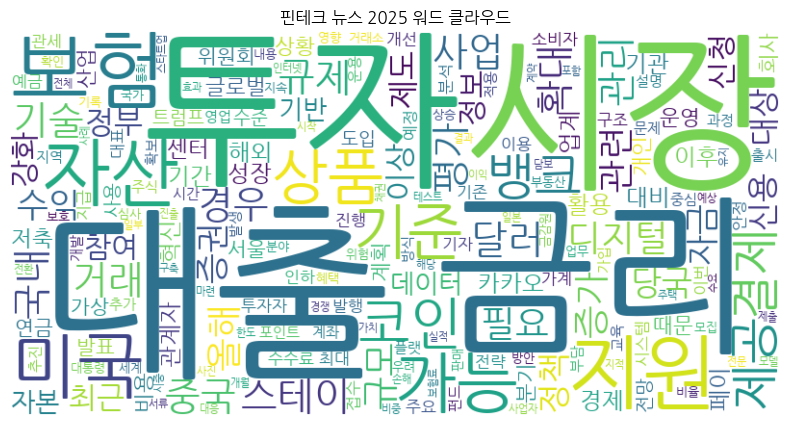

In [37]:
wc = WordCloud(
        font_path='NanumGothic.ttf',
        background_color='white',
        width=800,
        height=400).generate_from_frequencies(word_freq)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("핀테크 뉴스 2025 워드 클라우드")
plt.show()

# word2vec, LDA 토픽 모델링, T-sne 시각화

In [40]:
from gensim.models import CoherenceModel
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [66]:
def find_optimal_topics(tokenized_texts, start=2, end=8):
    
    # gensim으로 BoW(숫자로 인코딩 된 단어 모음)
    dictionary = corpora.Dictionary(tokenized_texts)
    vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
    
    try:
        doc_term_matrix = vectorizer.fit_transform(tokenized_texts)
    except:
        print("벡터화중 오류발생, 기본 토픽 수 2개 반환")
        return start
    
    best_score = -1
    best_n = start
    
    # LDA 분석
    for n_topics in range(start, end+1):
        lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda_model.fit(doc_term_matrix)
        
        feature_names = vectorizer.get_feature_names_out()
        # 상위 10개의 단어를 순서대로 추출
        topics = [[feature_names[i] for i in topic.argsort()[:-11:-1]] for topic in lda_model.components_]
        
        # 응집도 계산
        cm = CoherenceModel(topics=topics, texts=tokenized_texts, dictionary=dictionary, coherence="c_v")
        score = cm.get_coherence()
        print(f"토픽수: {n_topics}, Coherence Score: {score:.4f}")
        
        if score > best_score:
            best_score = score
            best_n = n_topics
    
    print(f"최적 토픽수: {best_n} (Score: {best_score:.4f})")
    return best_n
        

In [44]:
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=2, workers=8, sg=1)

In [45]:
def topic_modeling(tokenized_texts_df, w2v_model, month):
    
    print("--- 토픽 모델링 시작 ---")
    
    # 최적 토픽 수 탐색
    try:
        print(f"\n핀테크 뉴스 2025 {month}월 최적 토픽 수 계산 중...")
        best_k = find_optimal_topics(tokenized_texts_df)
    except Exception as e:
        print(f"\n핀테크 뉴스 2025 {month}월 최적 토픽 수 계산 오류 {e}")

    # CountVectorizer
    try:
        vectorizer = CountVectorizer(tokenizer=lambda x: x, token_pattern=None, lowercase=False, max_df=0.9, min_df=5)
        review_vec = vectorizer.fit_transform(tokenized_texts_df)

        if review_vec.shape[1] == 0:
            print(f"\n핀테크 뉴스 2025 {month}월 min_df 조건 만족 단어 없음 - 스킵")


        # LDA 학습
        lda_model = LatentDirichletAllocation(n_components=best_k, random_state=42)
        lda_model.fit(review_vec)

        words = vectorizer.get_feature_names_out()

        # 토픽별 상위 단어 출력 + 전체 단어 set에 모으기
        all_topic_words = set()
        print(f"\n핀테크 뉴스 2025 {month}월 토픽별 상위 단어 (k={best_k})")
        print("=" * 60)
        for i, topic in enumerate(lda_model.components_):
            top = [words[idx] for idx in topic.argsort()[-10:]]
            print(f"Topic #{i}: {top}")
            all_topic_words.update(top)

        print(f"\n핀테크 뉴스 2025 {month}월 토픽 단어 총 {len(all_topic_words)}개")

        # 토픽 단어 중 word2vec에 있는 것만 사용해서 시각화
        valid_words = [word for word in all_topic_words if word in w2v_model.wv]
        print(f"word2vec에 포함된 토픽 단어 수: {len(valid_words)}개")

        vectors = np.array([w2v_model.wv[word] for word in valid_words])

        tsne_perplexity = min(10, len(valid_words) -1)
        if tsne_perplexity < 2:
            tsne_perplexity = 2

        tsne = TSNE(n_components=2, random_state=42, perplexity=tsne_perplexity)
        reduced_vecs = tsne.fit_transform(vectors)

        # tsne 시각화

        plt.figure(figsize=(10, 6))
        for i, word in enumerate(valid_words):
            x, y = reduced_vecs[i]
            plt.scatter(x, y)
            plt.text(x + 0.01, y +0.01, word, fontsize=12)
        plt.title(f"\n핀테크 뉴스 2025 {month}월 토픽 단어의 Word2Vec 유사도 기반 시각화 (T-SNE)")
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(e)


In [57]:
df.loc[:, '날짜'] = pd.to_datetime(df['날짜'])
df

,날짜,제목,원문링크,뉴스본문,tokens
1,2025-11-19 00:00:00,한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...,"[한국, 핀테크, 지원, 센터, 핀테크, 산업, 성장, 기여, 최신, 트렌드, 반영..."
2,2025-11-19 00:00:00,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 핀테크산업협회 사무국입니다 협회는 핀테크 기업과 금융기관 AFA 등 해외...,"[안녕, 핀테크, 산업, 협회, 사무국, 협회, 핀테크, 기업, 금융, 기관, 해외..."
3,2025-11-19 00:00:00,한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 한국핀테크지원센터입니다 2025년 금융특화 계층별 AI역량강화 과정 핀테...,"[안녕, 한국, 핀테크, 지원, 센터, 금융, 특화, 계층, 역량, 강화, 과정, ..."
4,2025-11-19 00:00:00,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...,https://fintech.or.kr/web/board/boardContentsV...,2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기업 모집 한국핀테크...,"[핀테크, 기업, 온라인, 용관, 사람, 참여, 기업, 모집, 한국, 핀테크, 지원..."
5,2025-11-19 00:00:00,금융위 5대 금융지주 불러모아 포용금융 적극 역할 당부,https://n.news.naver.com/mnews/article/016/000...,포용금융 소통 점검회의 개최기관별 지원현황 준비상황 점검 금융위원회 제공 헤럴드경...,"[포용, 금융, 소통, 점검, 회의, 개최, 기관, 지원, 현황, 준비, 상황, 점..."
...,...,...,...,...,...
11746,2024-12-16 00:00:00,수렁에 빠진 중국 경제 몰락 중산층 2000만명 우버 택시로 몰렸다,https://n.news.naver.com/mnews/article/023/000...,온차이나 중국 민간 경제 전문가들 통계보다 훨씬 더 나쁘고 성장시대 저문다 경고 연...,"[온차, 중국, 민간, 경제, 전문가, 통계, 성장, 시대, 경고, 연간, 장률, ..."
11747,2024-12-16 00:00:00,관세 폭탄 때문에 내년엔 더 비싸 생필품 가전 등 사재기 열풍 부는,https://n.news.naver.com/mnews/article/277/000...,WSJ 사재기가 인플레이션 부추길 수도 지적미국의 일부 소비자들이 도널드 트럼프 미...,"[사재기, 인플레이션, 지적, 미국, 일부, 소비자, 도널드, 트럼프, 미국, 대통..."
11748,2024-12-16 00:00:00,구글 메타 등과 AI칩 합작 브로드컴 엔비디아 대항마로,https://n.news.naver.com/mnews/article/023/000...,시총도 1조달러 돌파 미국 반도체 기업 브로드컴이 13일 처음으로 시가총액 이...,"[달러, 돌파, 미국, 반도체, 기업, 브로드컴, 처음, 시가총액, 달러, 돌파, ..."
11749,2024-12-16 00:00:00,중국의 중동 동남아 통한 AI 반도체 우회 조달도 막는다,https://n.news.naver.com/mnews/article/023/000...,수출 물량 상한제 추진 미국 정부가 국가 안보를 이유로 특정 국가들에 인공지능 A...,"[수출, 물량, 상한, 추진, 미국, 정부, 국가, 안보, 이유, 특정, 국가, 인..."


In [61]:
df['날짜'] = pd.to_datetime(df['날짜'])

/tmp/ipykernel_924/2071769210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['날짜'] = pd.to_datetime(df['날짜'])


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11686 entries, 1 to 11750
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      11686 non-null  datetime64[ns]
 1   제목      11686 non-null  object        
 2   원문링크    11686 non-null  object        
 3   뉴스본문    11686 non-null  object        
 4   tokens  11686 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 805.8+ KB


In [63]:
df.loc[df['날짜'].dt.month == 1]

,날짜,제목,원문링크,뉴스본문,tokens
10327,2025-01-31,한국핀테크지원센터x구름 2025 핀테크 벤처 스타트업 아카데미 핀테크 인턴십 코스 ...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터x구름 2025 핀테크 벤처 스타트업 아카데미 핀테크 인턴십 코스 ...,"[한국, 핀테크, 지원, 센터, 구름, 핀테크, 벤처, 스타트업, 아카데미, 핀테크..."
10328,2025-01-31,공고 2024년도 한국핀테크지원센터 종합 홍보대행사 선정 공고 2 7 17 00,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 및 센터가 주관하는 사업 및 행사 등을핀테크 기업 금융기...,"[한국, 핀테크, 지원, 센터, 핀테크, 센터, 주관, 사업, 행사, 핀테크, 기업..."
10329,2025-01-31,금융위 IFRS재단 등 회계분야 국제기구 국내 인사 간담회,https://n.news.naver.com/mnews/article/018/000...,국내 인사 2명 회계분야 국제기구 신규 진출IFRS 제개정 등 주요 의제에 국내 의...,"[국내, 인사, 회계, 분야, 국제기구, 신규, 진출, 개정, 주요, 의제, 국내,..."
10330,2025-01-31,11월 WGBI 편입 대비 금융당국 외국인 투자자 위한 국채통합매매계좌 도입,https://n.news.naver.com/mnews/article/366/000...,외국 금융기관의 외국인 대상 장외 채권 공매도 허용 금융당국이 외국 금융투자업자가...,"[외국, 금융, 기관, 외국인, 대상, 장외, 채권, 공매도, 허용, 금융, 당국,..."
10331,2025-01-31,금감원 급격한 엔캐리 청산 유인 낮아 대외여건 면밀히 모니터링,https://n.news.naver.com/mnews/article/014/000...,이복현 금융감독원장이 24일 오전 서울 영등포구 금감원에서 금융상황 점검회의 를 주...,"[복현, 금융, 감독, 원장, 오전, 서울, 영등포구, 금감원, 금융, 상황, 점검..."
...,...,...,...,...,...
11179,2025-01-02,당장 돈 안되고 성능향상 기대 못 미쳐도 세계는 AI인프라 영끌,https://n.news.naver.com/mnews/article/029/000...,오픈AI 오리온 데이터 늘려도성능 큰 차이 없어 난관 봉착기업 70 AI 투자 위험...,"[오픈, 오리온, 데이터, 성능, 차이, 난관, 봉착, 기업, 투자, 위험, 요소,..."
11180,2025-01-02,트럼프 2 0시대 중국 미 동맹국 이탈 기대하며 버티기 다시 만난 트럼프,https://n.news.naver.com/mnews/article/032/000...,2019년 6월29일 일본 오사카에서 열린 주요 20개국 G20 정상회담에서 시진핑...,"[일본, 오사카, 주요, 개국, 정상, 회담, 시진핑, 중국, 국가, 주석, 도널드..."
11181,2025-01-02,51번째 주 모욕 당했는데 트럼프에 찍소리 못하는 이유 김리안의 에네르기파WAR,https://n.news.naver.com/mnews/article/015/000...,글로벌 전기 무기화 트럼프 관세 협박에 캐나다 최후의 보루까지 잃을까 전전긍긍 이 ...,"[글로벌, 전기, 무기, 트럼프, 관세, 협박, 캐나다, 최후, 보루, 전전긍긍, ..."
11182,2025-01-02,산업은행 2025년 상반기 KDB NextONE 참여 스타트업 모집 서울 부산 25...,https://fintech.or.kr/web/board/boardContentsV...,2025년 상반기 KDB NextONE 참여 스타트업 모집 공고 1 공 고 명 20...,"[상반기, 참여, 스타트업, 모집, 공고, 상반기, 대한민국, 미래, 성장, 혁신,..."


--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 1월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4228
토픽수: 3, Coherence Score: 0.4463
토픽수: 4, Coherence Score: 0.5006
토픽수: 5, Coherence Score: 0.4957
토픽수: 6, Coherence Score: 0.5495
토픽수: 7, Coherence Score: 0.5484
토픽수: 8, Coherence Score: 0.5887
최적 토픽수: 8 (Score: 0.5887)

핀테크 뉴스 2025 1월 토픽별 상위 단어 (k=8)
Topic #0: ['세계', '관세', '대통령', '시장', '기술', '달러', '기업', '중국', '트럼프', '미국']
Topic #1: ['관리', '디지털', '시장', '투자', '혁신', '증권', '정보', '업무', '서비스', '금융']
Topic #2: ['보장', '급여', '부담', '세대', '금융', '손해', '보험료', '수수료', '카드', '보험']
Topic #3: ['기업', '거래소', '상장', '투자', '투자자', '금융', '거래', '시장', '가상', '자산']
Topic #4: ['사회', '수익', '증권', '경제', '시장', '주식', '자산', '퇴직', '연금', '투자']
Topic #5: ['분기', '올해', '가계', '인하', '기준', '지난해', '금융', '대출', '금리', '은행']
Topic #6: ['과정', '한국', '인턴', '제공', '교육', '센터', '모집', '기업', '지원', '핀테크']
Topic #7: ['인터넷', '결제', '토스', '금융', '고객', '카카오', '페이', '은행', '서비스', '뱅크']

핀테크 뉴스 2025 1월 토픽 단어 총 65개
word2vec에 포함된 토픽 단어 수: 65개


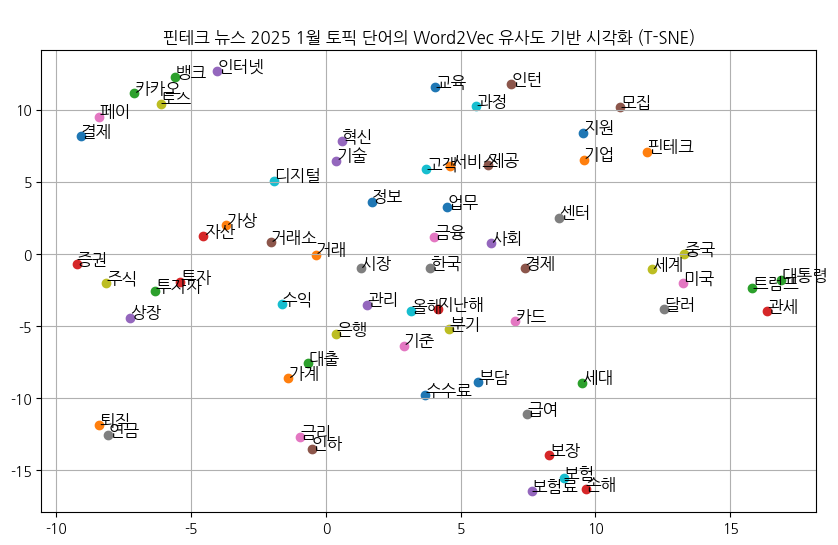

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 2월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3947
토픽수: 3, Coherence Score: 0.4800
토픽수: 4, Coherence Score: 0.5018
토픽수: 5, Coherence Score: 0.5588
토픽수: 6, Coherence Score: 0.5779
토픽수: 7, Coherence Score: 0.6027
토픽수: 8, Coherence Score: 0.6164
최적 토픽수: 8 (Score: 0.6164)

핀테크 뉴스 2025 2월 토픽별 상위 단어 (k=8)
Topic #0: ['거래', '거래소', '대출', '금융', '시장', '예금', '기준', '인하', '은행', '금리']
Topic #1: ['자본', '강화', '시장', '계획', '당국', '회사', '관련', '검사', '금감원', '금융']
Topic #2: ['시장', '투자', '경제', '대통령', '정책', '관세', '달러', '트럼프', '중국', '미국']
Topic #3: ['저축', '신용', '카드', '가계', '증가', '뱅크', '지난해', '금융', '대출', '은행']
Topic #4: ['가입', '판매', '수익', '지난해', '금융', '증권', '연금', '투자', '상품', '보험']
Topic #5: ['서비스', '데이터', '투자', '금융', '지원', '사업', '가상', '핀테크', '자산', '기업']
Topic #6: ['서비스', '비용', '기업', '핀테크', '지원', '수수료', '금융', '결제', '페이', '카드']
Topic #7: ['업계', '유통', '손해', '자동차', '기업', '조각', '증권', '보험', '발행', '투자']

핀테크 뉴스 2025 2월 토픽 단어 총 59개
word2vec에 포함된 토픽 단어 수: 59개


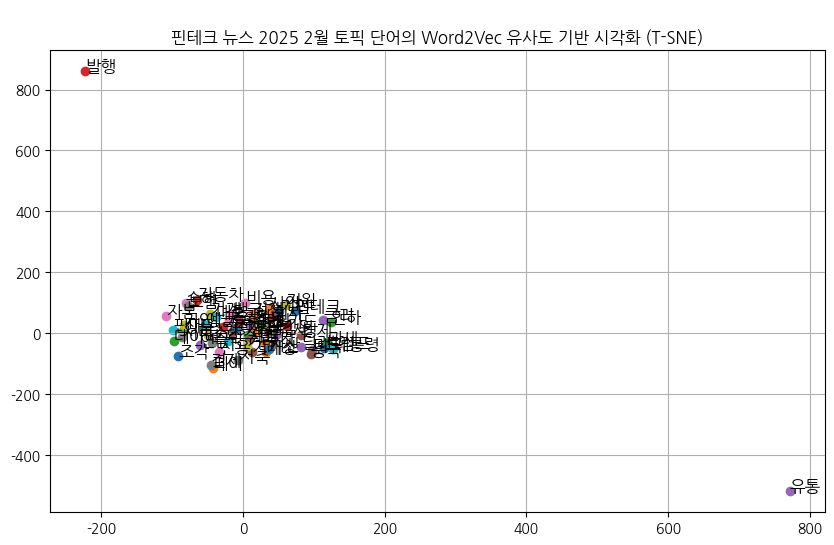

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 3월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4130
토픽수: 3, Coherence Score: 0.4105
토픽수: 4, Coherence Score: 0.4142
토픽수: 5, Coherence Score: 0.4594
토픽수: 6, Coherence Score: 0.4972
토픽수: 7, Coherence Score: 0.5865
토픽수: 8, Coherence Score: 0.5768
최적 토픽수: 7 (Score: 0.5865)

핀테크 뉴스 2025 3월 토픽별 상위 단어 (k=7)
Topic #0: ['은행', '결제', '점포', '가입', '계좌', '화폐', '발행', '디지털', '금융', '연금']
Topic #1: ['접수', '비용', '테스트', '심사', '모집', '사업', '핀테크', '금융', '기업', '지원']
Topic #2: ['대통령', '투자', '경제', '시장', '기업', '관세', '트럼프', '달러', '중국', '미국']
Topic #3: ['기관', '관련', '금감원', '시스템', '강화', '규제', '기업', '시장', '투자', '금융']
Topic #4: ['보험료', '거래', '금융', '상품', '결제', '수수료', '서비스', '페이', '카드', '보험']
Topic #5: ['상품', '가계', '기준', '지난해', '공매도', '저축', '금융', '금리', '대출', '은행']
Topic #6: ['투자', '서비스', '증권', '대출', '가상', '신용', '자산', '뱅크', '금융', '은행']

핀테크 뉴스 2025 3월 토픽 단어 총 54개
word2vec에 포함된 토픽 단어 수: 54개


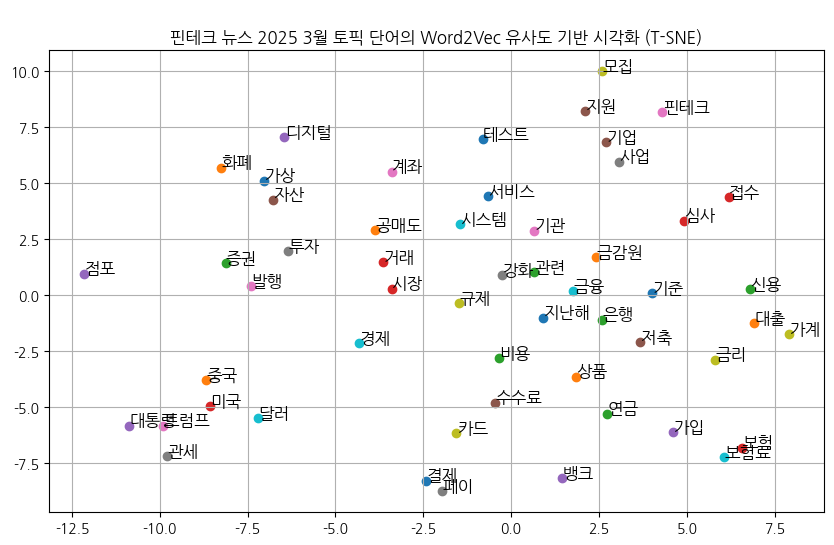

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 4월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4287
토픽수: 3, Coherence Score: 0.5058
토픽수: 4, Coherence Score: 0.5420
토픽수: 5, Coherence Score: 0.5663
토픽수: 6, Coherence Score: 0.5782
토픽수: 7, Coherence Score: 0.5712
토픽수: 8, Coherence Score: 0.5495
최적 토픽수: 6 (Score: 0.5782)

핀테크 뉴스 2025 4월 토픽별 상위 단어 (k=6)
Topic #0: ['평가', '기준', '테스트', '비용', '기업', '금융', '지원', '금리', '은행', '대출']
Topic #1: ['무역', '경제', '시장', '기업', '대통령', '달러', '트럼프', '중국', '관세', '미국']
Topic #2: ['참여', '스타트업', '모집', '한국', '센터', '핀테크', '기술', '기업', '지원', '금융']
Topic #3: ['달러', '금융', '시장', '은행', '가상', '디지털', '스테이', '결제', '자산', '코인']
Topic #4: ['제공', '토스', '뱅크', '은행', '상품', '고객', '카드', '보험', '금융', '서비스']
Topic #5: ['연금', '자본', '보험', '수익', '자산', '증권', '시장', '은행', '투자', '금융']

핀테크 뉴스 2025 4월 토픽 단어 총 45개
word2vec에 포함된 토픽 단어 수: 45개


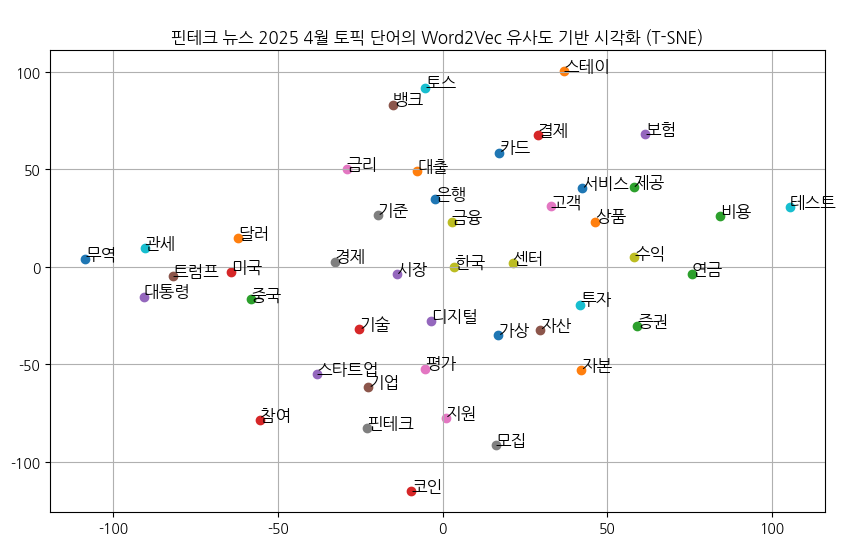

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 5월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4339
토픽수: 3, Coherence Score: 0.4106
토픽수: 4, Coherence Score: 0.4638
토픽수: 5, Coherence Score: 0.5304
토픽수: 6, Coherence Score: 0.5341
토픽수: 7, Coherence Score: 0.5481
토픽수: 8, Coherence Score: 0.5476
최적 토픽수: 7 (Score: 0.5481)

핀테크 뉴스 2025 5월 토픽별 상위 단어 (k=7)
Topic #0: ['혜택', '심사', '핀테크', '접수', '지원', '지역', '모집', '금융', '외국인', '카드']
Topic #1: ['금융', '거래', '시장', '디지털', '가상', '달러', '결제', '자산', '스테이', '코인']
Topic #2: ['정보', '제공', '토스', '상품', '연금', '은행', '뱅크', '고객', '서비스', '금융']
Topic #3: ['센터', '평가', '비용', '금융', '접수', '신청', '테스트', '핀테크', '기업', '지원']
Topic #4: ['달러', '대통령', '무역', '경제', '시장', '트럼프', '관세', '중국', '미국', '보험']
Topic #5: ['증가', '예금', '신용', '기준', '저축', '분기', '금융', '금리', '대출', '은행']
Topic #6: ['투자자', '규제', '상장', '펀드', '증권', '기업', '자본', '시장', '투자', '금융']

핀테크 뉴스 2025 5월 토픽 단어 총 57개
word2vec에 포함된 토픽 단어 수: 57개


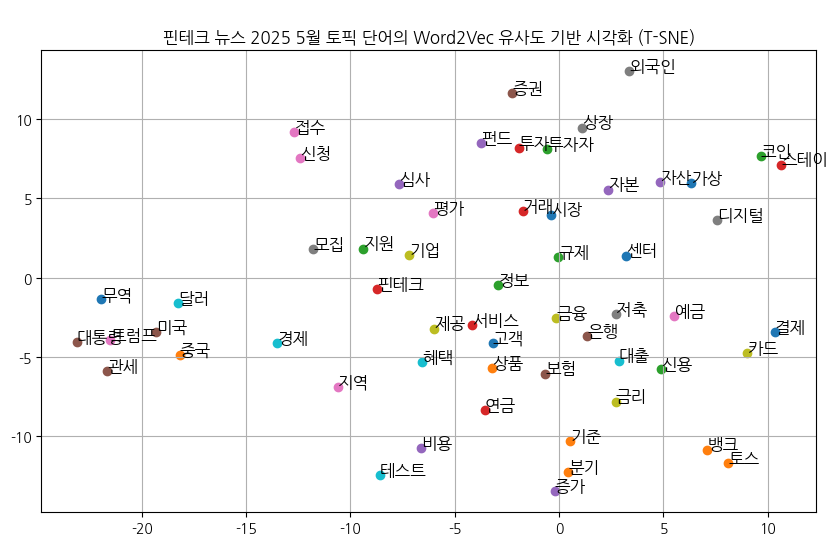

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 6월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4731
토픽수: 3, Coherence Score: 0.4533
토픽수: 4, Coherence Score: 0.5525
토픽수: 5, Coherence Score: 0.5471
토픽수: 6, Coherence Score: 0.5863
토픽수: 7, Coherence Score: 0.6085
토픽수: 8, Coherence Score: 0.5817
최적 토픽수: 7 (Score: 0.6085)

핀테크 뉴스 2025 6월 토픽별 상위 단어 (k=7)
Topic #0: ['기업', '증권', '상품', '자산', '연금', '서비스', '금융', '시장', '데이터', '투자']
Topic #1: ['제출', '평가', '테스트', '접수', '신청', '투자', '금융', '핀테크', '기업', '지원']
Topic #2: ['인하', '예금', '주택', '증가', '기준', '가계', '금융', '은행', '금리', '대출']
Topic #3: ['트럼프', '경제', '일본', '자본', '투자', '정책', '기업', '달러', '시장', '미국']
Topic #4: ['통제', '보험료', '상품', '판매', '계약', '보장', '손해', '미국', '중국', '보험']
Topic #5: ['확대', '제공', '신용', '대출', '토스', '고객', '서비스', '뱅크', '은행', '금융']
Topic #6: ['시장', '발행', '디지털', '금융', '페이', '자산', '카드', '결제', '스테이', '코인']

핀테크 뉴스 2025 6월 토픽 단어 총 54개
word2vec에 포함된 토픽 단어 수: 54개


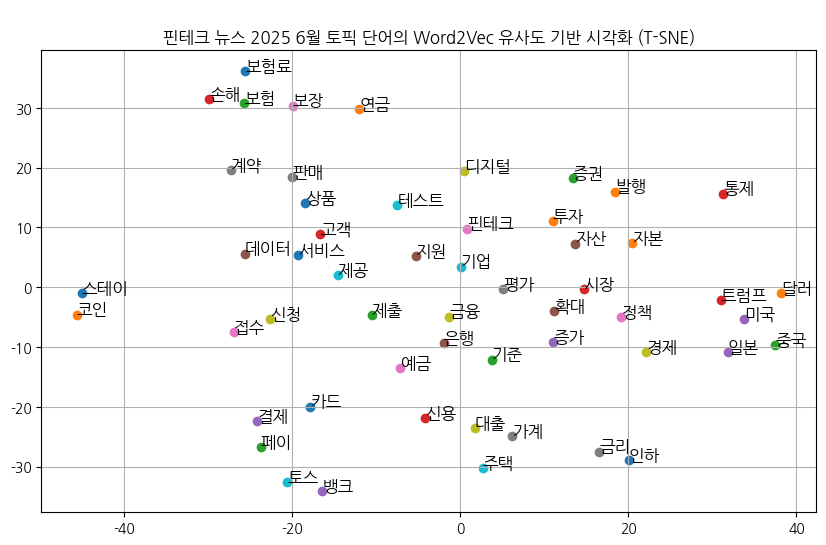

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 7월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.5187
토픽수: 3, Coherence Score: 0.4681
토픽수: 4, Coherence Score: 0.5680
토픽수: 5, Coherence Score: 0.5683
토픽수: 6, Coherence Score: 0.5363
토픽수: 7, Coherence Score: 0.5085
토픽수: 8, Coherence Score: 0.5748
최적 토픽수: 8 (Score: 0.5748)

핀테크 뉴스 2025 7월 토픽별 상위 단어 (k=8)
Topic #0: ['대출', '수수료', '토스', '금융', '고객', '카드', '서비스', '카카오', '은행', '뱅크']
Topic #1: ['국가', '합의', '무역', '협상', '달러', '대통령', '트럼프', '관세', '중국', '미국']
Topic #2: ['거래소', '자산', '거래', '페이', '서비스', '금융', '결제', '시장', '투자', '보험']
Topic #3: ['자산', '투자', '기준', '수익', '예금', '상품', '저축', '금리', '은행', '금융']
Topic #4: ['담보', '카드', '주택', '규제', '보험', '금리', '가계', '금융', '은행', '대출']
Topic #5: ['은행', '결제', '발행', '달러', '디지털', '시장', '금융', '자산', '스테이', '코인']
Topic #6: ['교육', '기술', '보이스', '피싱', '활용', '과정', '평가', '정보', '데이터', '금융']
Topic #7: ['제공', '한국', '서류', '센터', '교육', '신청', '참여', '지원', '핀테크', '기업']

핀테크 뉴스 2025 7월 토픽 단어 총 60개
word2vec에 포함된 토픽 단어 수: 60개


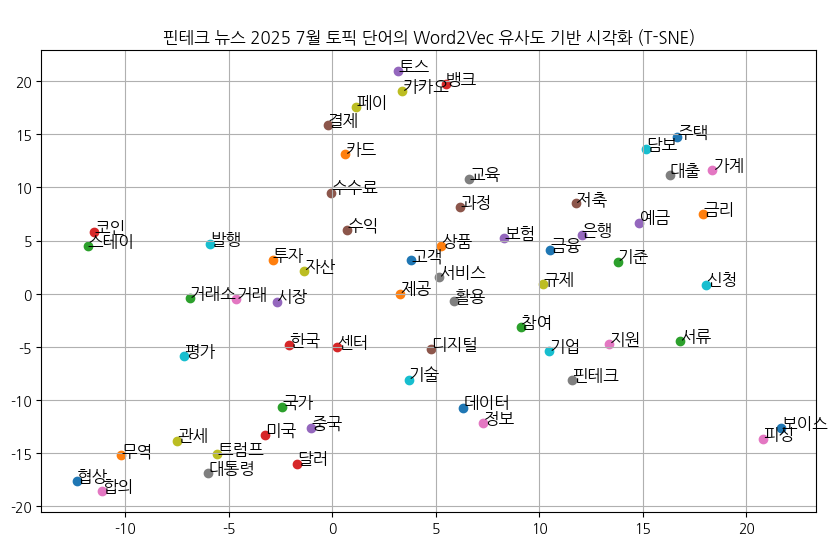

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 8월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4821
토픽수: 3, Coherence Score: 0.4789
토픽수: 4, Coherence Score: 0.5652
토픽수: 5, Coherence Score: 0.5788
토픽수: 6, Coherence Score: 0.5801
토픽수: 7, Coherence Score: 0.5875
토픽수: 8, Coherence Score: 0.5939
최적 토픽수: 8 (Score: 0.5939)

핀테크 뉴스 2025 8월 토픽별 상위 단어 (k=8)
Topic #0: ['인하', '규제', '시장', '가계', '기준', '신용', '금리', '은행', '금융', '대출']
Topic #1: ['금융', '참여', '진출', '발표', '서류', '신청', '해외', '지원', '기업', '핀테크']
Topic #2: ['고객', '분석', '기반', '참여', '활용', '정보', '서비스', '지원', '데이터', '금융']
Topic #3: ['사례', '경제', '정부', '기업', '대통령', '트럼프', '관세', '금융', '중국', '미국']
Topic #4: ['토스', '고객', '금융', '카카오', '페이', '은행', '뱅크', '서비스', '결제', '카드']
Topic #5: ['참여', '대상', '기업', '센터', '한국', '지원', '금융', '과정', '핀테크', '교육']
Topic #6: ['예금', '보험료', '손해', '가입', '상품', '금융', '연금', '저축', '은행', '보험']
Topic #7: ['디지털', '달러', '가상', '기업', '금융', '투자', '시장', '자산', '스테이', '코인']

핀테크 뉴스 2025 8월 토픽 단어 총 60개
word2vec에 포함된 토픽 단어 수: 60개


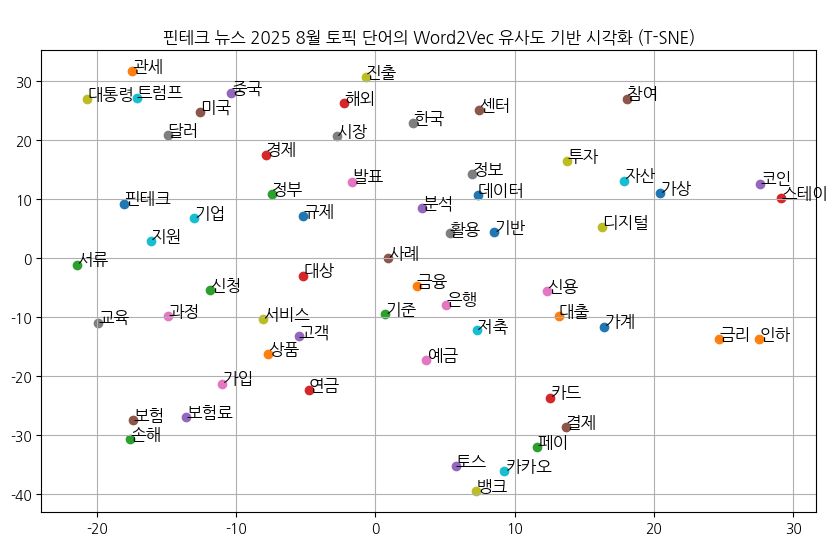

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 9월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3573
토픽수: 3, Coherence Score: 0.4174
토픽수: 4, Coherence Score: 0.4604
토픽수: 5, Coherence Score: 0.4740
토픽수: 6, Coherence Score: 0.4688
토픽수: 7, Coherence Score: 0.5252
토픽수: 8, Coherence Score: 0.5209
최적 토픽수: 7 (Score: 0.5252)

핀테크 뉴스 2025 9월 토픽별 상위 단어 (k=7)
Topic #0: ['주식', '투자자', '중국', '성장', '거래', '글로벌', '기업', '미국', '투자', '시장']
Topic #1: ['신용', '정부', '뱅크', '소비자', '기업', '금리', '규제', '대출', '은행', '금융']
Topic #2: ['자산', '고객', '투자', '서비스', '연금', '은행', '상품', '금융', '카드', '금리']
Topic #3: ['개발', '고객', '보안', '활용', '중국', '금융', '기술', '기업', '데이터', '서비스']
Topic #4: ['미국', '가상', '결제', '디지털', '달러', '발행', '금융', '자산', '스테이', '코인']
Topic #5: ['증가', '생명', '상품', '보험금', '손해', '참여', '지원', '핀테크', '기업', '보험']
Topic #6: ['심사', '대상', '한국', '아이디어', '신청', '센터', '교육', '금융', '지원', '핀테크']

핀테크 뉴스 2025 9월 토픽 단어 총 52개
word2vec에 포함된 토픽 단어 수: 52개


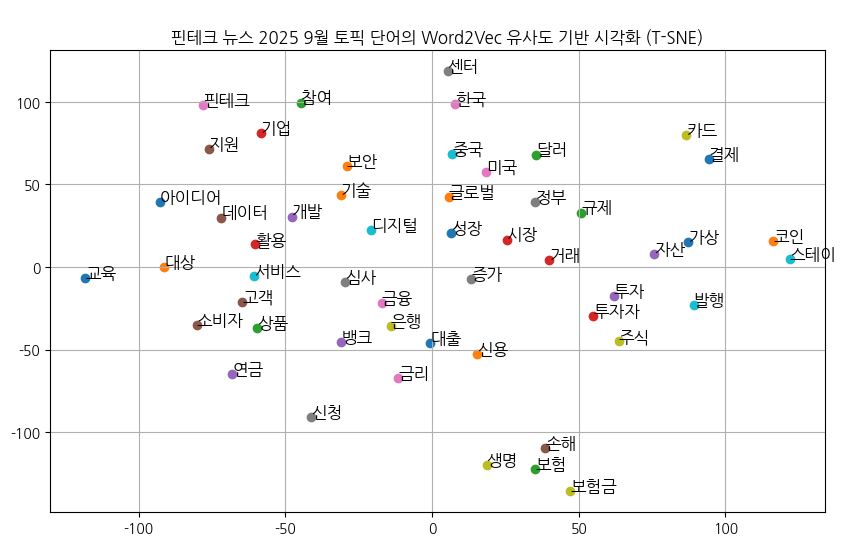

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 10월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4133
토픽수: 3, Coherence Score: 0.4245
토픽수: 4, Coherence Score: 0.4338
토픽수: 5, Coherence Score: 0.4325
토픽수: 6, Coherence Score: 0.4681
토픽수: 7, Coherence Score: 0.4749
토픽수: 8, Coherence Score: 0.5270
최적 토픽수: 8 (Score: 0.5270)

핀테크 뉴스 2025 10월 토픽별 상위 단어 (k=8)
Topic #0: ['가계', '규제', '저축', '데이터', '신용', '뱅크', '금리', '금융', '은행', '대출']
Topic #1: ['전망', '은행', '인하', '기준', '투자', '시장', '분기', '금융', '수익', '금리']
Topic #2: ['투자', '소비자', '위원회', '거래', '보호', '보안', '서비스', '은행', '정보', '금융']
Topic #3: ['미국', '시장', '중국', '기술', '자산', '산업', '기업', '스테이', '코인', '금융']
Topic #4: ['생명', '손해', '제도', '보험금', '보험료', '금융', '연금', '상품', '카드', '보험']
Topic #5: ['과정', '한국', '참여', '금융', '신청', '센터', '교육', '기업', '지원', '핀테크']
Topic #6: ['주식', '투자자', '가상', '거래소', '거래', '투자', '시장', '미국', '자산', '달러']
Topic #7: ['협력', '제공', '기술', '투자', '네이버', '스타트업', '페이', '서비스', '기업', '결제']

핀테크 뉴스 2025 10월 토픽 단어 총 60개
word2vec에 포함된 토픽 단어 수: 60개


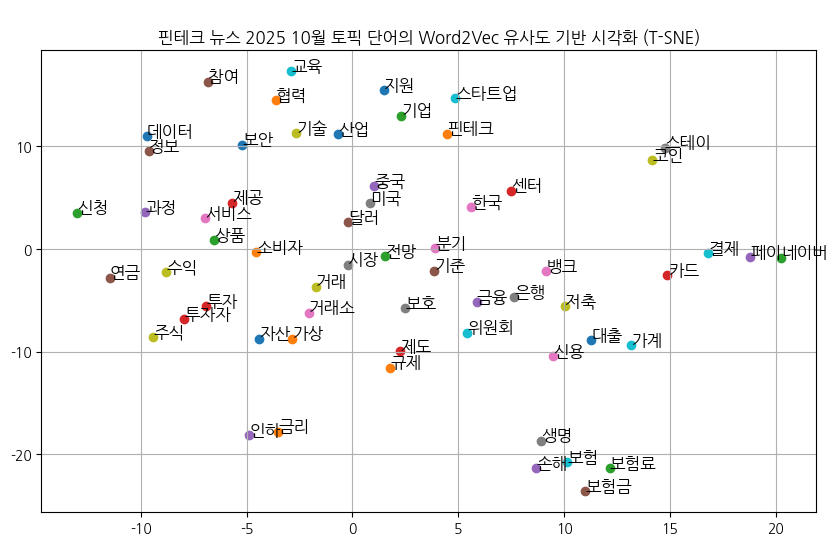

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 11월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4255
토픽수: 3, Coherence Score: 0.4205
토픽수: 4, Coherence Score: 0.4578
토픽수: 5, Coherence Score: 0.4864
토픽수: 6, Coherence Score: 0.5245
토픽수: 7, Coherence Score: 0.4845
토픽수: 8, Coherence Score: 0.4682
최적 토픽수: 6 (Score: 0.5245)

핀테크 뉴스 2025 11월 토픽별 상위 단어 (k=6)
Topic #0: ['주식', '자본', '투자자', '발행', '거래', '증권', '자산', '시장', '금융', '투자']
Topic #1: ['금융', '산업', '투자', '경제', '정부', '기업', '달러', '중국', '데이터', '미국']
Topic #2: ['카카오', '증가', '신용', '뱅크', '분기', '금융', '카드', '금리', '대출', '은행']
Topic #3: ['데이터', '활용', '시장', '기반', '기술', '디지털', '기업', '서비스', '결제', '금융']
Topic #4: ['보험료', '지주', '대출', '개선', '소비자', '관리', '당국', '자본', '보험', '금융']
Topic #5: ['한국', '센터', '참여', '교육', '신청', '스테이', '코인', '기업', '지원', '핀테크']

핀테크 뉴스 2025 11월 토픽 단어 총 49개
word2vec에 포함된 토픽 단어 수: 49개


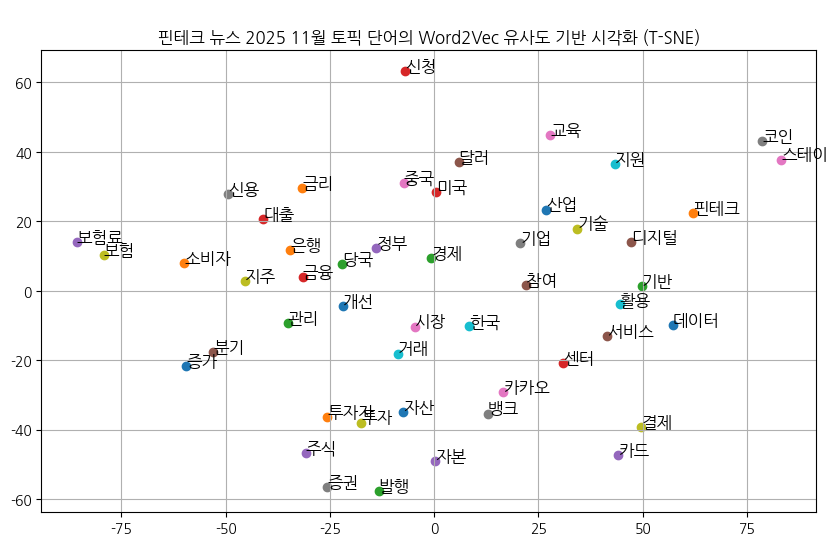

In [67]:
for month in range(1,12):
    topic_modeling(df.loc[df['날짜'].dt.month == month, 'tokens'], w2v_model, month)
    

In [72]:
# !pip install python-dotenv
# !pip install google-genai

In [75]:
import os
from dotenv import load_dotenv
load_dotenv("./.env_gemini")
GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')


In [76]:
from google import genai

In [78]:
# The client gets the API key from the environment variable `GEMINI_API_KEY`.
client = genai.Client(api_key=GEMINI_API_KEY)

response = client.models.generate_content(
    model="gemini-2.5-flash", contents="핀테크에 대해서 알려줘"
)
print(response.text)

## 핀테크(FinTech)에 대해 알려드릴게요!

**핀테크(FinTech)**는 **Finance(금융)**와 **Technology(기술)**의 합성어로, 정보통신기술(ICT)을 활용하여 기존 금융 서비스의 전달 방식을 혁신하고 효율성을 높이는 모든 형태의 기술 기반 금융 서비스를 총칭합니다.

쉽게 말해, **기술로 금융을 더 편리하고, 빠르고, 저렴하게 만드는 것**이라고 생각하시면 됩니다.

---

### 핀테크의 주요 특징 및 장점:

1.  **편의성 (Convenience):** 은행에 직접 방문할 필요 없이 스마트폰 앱 하나로 계좌 개설, 송금, 대출 신청, 투자 등을 할 수 있게 됩니다.
2.  **효율성 (Efficiency):** 복잡한 수작업 과정을 자동화하고, 중간 단계를 줄여 시간과 비용을 절감합니다.
3.  **접근성 (Accessibility):** 금융 소외 계층이나 기존 금융 서비스 이용이 어려웠던 사람들도 쉽게 금융 서비스를 이용할 수 있게 돕습니다. (예: 마이크로 대출, 간편 송금)
4.  **혁신성 (Innovation):** 인공지능, 빅데이터, 블록체인 등 최신 기술을 접목하여 기존에 없던 새로운 금융 상품과 서비스를 창출합니다.
5.  **개인화 (Personalization):** 사용자 데이터를 분석하여 맞춤형 금융 상품 추천, 자산 관리 조언 등을 제공합니다.

---

### 핀테크의 주요 분야와 예시:

핀테크는 매우 광범위하며, 다양한 분야에서 혁신을 이끌고 있습니다.

1.  **간편 결제 및 송금 (Mobile Payments & Remittances):**
    *   **내용:** 스마트폰이나 웨어러블 기기를 이용해 빠르고 쉽게 결제하고 돈을 주고받는 서비스.
    *   **예시:** 카카오페이, 네이버페이, 삼성페이, 토스(송금), PayPal, 해외 송금 서비스(TransferWise 등)

2.  **온라인 자산 관리 및 투자 (Online Wealth Management & Inv

# 핀테크 뉴스 제목을 분기별로 gemini에게 요약시키고 아이디어 물어보기

In [85]:
titles = " ".join(df.loc[(df['날짜'].dt.month >= 1) & (df['날짜'].dt.month <= 3), '제목'].tolist()) 

In [86]:
len(titles)

94523

In [87]:
response = client.models.generate_content(
    model="gemini-2.5-flash", contents=f"""{titles}\n위의 글은 핀테크 관련 뉴스 제목들이야
    이 제목을 분석해서 어떤 이슈들이 중요한 사건이었는지 분석하고, 그 내용을 토대로
    새로운 핀테스 서비스를 기획할 때 사용할 수 있을 만한 아이디어 5개 제시해줘"""
)
print(response.text)

제공해주신 핀테크 관련 뉴스 제목들을 분석하여 중요한 이슈들을 파악하고, 이를 바탕으로 새로운 핀테크 서비스 아이디어를 기획해보겠습니다.

---

### **주요 이슈 분석**

뉴스 제목들을 종합적으로 분석했을 때, 다음과 같은 핵심 이슈들이 두드러집니다.

1.  **인터넷전문은행(인뱅)의 성장과 변화:**
    *   **초기 성장과 한계:** 카카오뱅크, 케이뱅크, 토스뱅크 등 기존 인뱅들은 흑자 전환, IPO 추진 등 고속 성장을 이뤘으나, '이자장사' 논란, 중저신용대출 목표 미달, 성장세 둔화 우려에 직면하고 있습니다.
    *   **사업 영역 확장:** 주택담보대출(주담대), 기업금융, 개인사업자 대출 등으로 사업 영역을 확장하려 하며, 해외 진출(태국 등)도 모색하고 있습니다.
    *   **경쟁 심화 및 제4인뱅:** 제4인뱅 출범 논의가 활발하며, 기존 시중은행들도 인뱅의 강점인 비대면/모바일 서비스를 강화하고 모임통장 등 인기 상품을 모방하며 경쟁이 격화되고 있습니다.
    *   **포용금융 압박:** 중저신용자 대출 확대, 소상공인 지원 등 포용금융 실천에 대한 금융당국의 압박이 지속됩니다.

2.  **AI 및 디지털 기술의 금융권 도입 가속화:**
    *   **활용 분야 확대:** 생성형 AI를 활용한 금융 특화 말뭉치 제공, AI 기반 자산관리(퇴직연금), 신용평가 모델 개발(대안신용평가), 금융사기 탐지 및 예방, 고객 서비스(AI 챗봇) 등 전방위적으로 확대되고 있습니다.
    *   **기술 주도권 경쟁 및 보안 우려:** '딥시크(Deepseek)' 사태 등으로 글로벌 AI 패권 경쟁이 심화되고 있으며, 개인정보 보호 및 사이버 안보에 대한 금융당국의 관심이 높습니다.
    *   **디지털 전환 가속화:** 점포 폐쇄, 비대면 계좌 개설, 모바일 앱 중심의 금융 서비스가 보편화되고 있습니다.

3.  **가상자산 시장의 제도화 및 확장:**
    *   **법인 투자 허용 논의:** 법인 가상자산 

# 분기별로 분석

In [88]:
results = ""
for mon in range(1, 13, 3):
    titles = " ".join(df.loc[(df['날짜'].dt.month >= mon) & (df['날짜'].dt.month <= mon+2), '제목'].tolist())
    response = client.models.generate_content(
    model="gemini-2.5-flash", contents=f"""{titles}\n위의 글은 핀테크 관련 뉴스 제목들이야
    이 제목을 분석해서 어떤 이슈들이 중요한 사건이었는지 분석하고, 그 내용을 토대로
    새로운 핀테스 서비스를 기획할 때 사용할 수 있을 만한 아이디어 5개 제시해줘"""
)
    results += "\n" + response.text
print(results)


제공해주신 핀테크 관련 뉴스 제목들을 분석하여 중요한 이슈와 트렌드를 파악하고, 이를 바탕으로 새로운 핀테크 서비스 아이디어를 제시합니다.

---

### **뉴스 제목 분석을 통한 주요 이슈 및 트렌드**

1.  **인터넷전문은행(인뱅)의 성장과 포용 금융 논란:**
    *   **성장:** 카카오뱅크, 케이뱅크, 토스뱅크 등 인뱅 3사의 순익 급증, 주담대, 전월세보증금대출, 개인사업자대출, 모임통장 등 상품 확대. 해외 진출 및 기업금융 진출 시도.
    *   **논란:** "이자장사" 비판, 중저신용자 대출 중단/축소, 예대율 규제, 포용 금융 외면 지적.
    *   **미래:** 제4인터넷은행 출범 논의 (한국소호, 유뱅크, 더존비즈온 등 경쟁 심화), 특화 전략 모색.
    *   **핵심 키워드:** 카카오뱅크, 케이뱅크, 토스뱅크, 제4인뱅, 주담대, 개인사업자대출, 포용금융, 이자장사.

2.  **AI 및 디지털 전환 가속화:**
    *   **활용:** 금융권 생성형 AI 지원 (금융 특화 한글 말뭉치 제공), AI 로보어드바이저 (퇴직연금), 대안신용평가 모델, AI 뱅커, 금융 앱 챗봇 고도화, 사이버 보안 강화.
    *   **투자:** 금융권의 디지털 IT 투자, AI 스타트업 육성, 글로벌 AI 패권 경쟁.
    *   **핵심 키워드:** AI, 생성형 AI, 디지털 전환, 로보어드바이저, 대안신용평가, 금융보안.

3.  **가상자산 시장의 제도권 편입 및 활성화:**
    *   **규제:** 금융당국의 가상자산 2단계 입법 논의, 법인 가상자산 투자 허용(법인계좌), FIU의 자금세탁방지 강화, 미신고 외국 가상자산사업자 앱 차단, 거래소 감독 강화.
    *   **기술:** CBDC 실거래 실험, 스테이블코인, 블록체인 기술 활용.
    *   **시사점:** 기관 투자자 및 기업의 시장 참여 기대.
    *   **핵심 키워드:** 가상자산, 법인계좌, CBDC, 스테이블코인, 자금세탁

# 분기별 분석결과를 모아서 다시 분석하고 서비스 아이디어 도출하기, 마크다운코드로 정리해서 받기

In [89]:
response = client.models.generate_content(
    model="gemini-2.5-flash", contents=f"""{results}\n 위의 글은 핀테크 관련 뉴스 제목을
    분기별로 모아서 분석했던 결과야. 이 모든 내용을 다시 종합해서 주요 이슈를 분석하고,
    그 내용을 토대로 새로운 핀테크 서비스를 기획할 때 사용할 수 있을만한 아이디어 10 제시해줘.
    그리고 웹을 검색해서 새로운 아이디어를 이미 서비스로 개발해서 출시한 앱이나 사이트가 있으면
    그곳의 링크 제시해줘. 이 모든 내용을 마크다운 표 코드로 정리되도록 해줘"""
)



sdk_http_response=HttpResponse(
  headers=<dict len=11>
) candidates=[Candidate(
  content=Content(
    parts=[
      Part(
        text="""제공해주신 핀테크 뉴스 제목들을 종합 분석하여 주요 이슈 및 트렌드를 도출하고, 이를 바탕으로 새로운 핀테크 서비스 아이디어 10가지와 각 아이디어에 대한 유사 서비스 검색 결과를 마크다운 표 코드로 정리했습니다.

---

### **종합 분석을 통한 주요 이슈 및 트렌드**

제공된 뉴스 제목들을 바탕으로 볼 때, 핀테크 시장은 다음과 같은 5가지 핵심 트렌드를 중심으로 발전하고 있음을 알 수 있습니다.

1.  **AI & 디지털 전환 가속화 (AI Everywhere):**
    *   **핵심:** 생성형 AI, 로보어드바이저, 대안신용평가, AI 뱅커, 금융 보안 등 금융 서비스의 전 과정에 AI 기술이 필수 요소로 자리 잡고 있으며, 금융권의 AI 역량 강화 투자와 규제 논의가 활발합니다.
    *   **키워드:** AI, 생성형 AI, 디지털 전환, 로보어드바이저, 대안신용평가, 금융보안, AI 거버넌스.

2.  **디지털 자산의 제도권 편입 및 활용 확장 (Digital Assets Mainstreaming):**
    *   **핵심:** 스테이블코인, 토큰증권(STO), 조각투자 등 블록체인 기반의 디지털 자산이 규제 프레임워크 내에서 새로운 금융 상품 및 결제 수단으로 부상하고 있습니다. 법인 투자 허용, CBDC 실험 등 기관과 정부의 관심이 커지고 있습니다.
    *   **키워드:** 가상자산, 스테이블코인, STO, 조각투자, CBDC, 블록체인.

3.  **금융 포용성 강화 및 취약계층 보호 (Financial Inclusion & Protection):**
    *   **핵심:** 인터넷전문은행의 포용 금융 의무, 중저신용자 대출 확대 요구, 소상공인 지원, 가계부채

In [90]:
print(response.text)

제공해주신 핀테크 뉴스 제목들을 종합 분석하여 주요 이슈 및 트렌드를 도출하고, 이를 바탕으로 새로운 핀테크 서비스 아이디어 10가지와 각 아이디어에 대한 유사 서비스 검색 결과를 마크다운 표 코드로 정리했습니다.

---

### **종합 분석을 통한 주요 이슈 및 트렌드**

제공된 뉴스 제목들을 바탕으로 볼 때, 핀테크 시장은 다음과 같은 5가지 핵심 트렌드를 중심으로 발전하고 있음을 알 수 있습니다.

1.  **AI & 디지털 전환 가속화 (AI Everywhere):**
    *   **핵심:** 생성형 AI, 로보어드바이저, 대안신용평가, AI 뱅커, 금융 보안 등 금융 서비스의 전 과정에 AI 기술이 필수 요소로 자리 잡고 있으며, 금융권의 AI 역량 강화 투자와 규제 논의가 활발합니다.
    *   **키워드:** AI, 생성형 AI, 디지털 전환, 로보어드바이저, 대안신용평가, 금융보안, AI 거버넌스.

2.  **디지털 자산의 제도권 편입 및 활용 확장 (Digital Assets Mainstreaming):**
    *   **핵심:** 스테이블코인, 토큰증권(STO), 조각투자 등 블록체인 기반의 디지털 자산이 규제 프레임워크 내에서 새로운 금융 상품 및 결제 수단으로 부상하고 있습니다. 법인 투자 허용, CBDC 실험 등 기관과 정부의 관심이 커지고 있습니다.
    *   **키워드:** 가상자산, 스테이블코인, STO, 조각투자, CBDC, 블록체인.

3.  **금융 포용성 강화 및 취약계층 보호 (Financial Inclusion & Protection):**
    *   **핵심:** 인터넷전문은행의 포용 금융 의무, 중저신용자 대출 확대 요구, 소상공인 지원, 가계부채 관리 및 불법 사금융 예방 등 금융 소외 계층을 위한 정책과 서비스가 중요해지고 있습니다. 소비자 보호, 금융 사기 예방 및 구제 노력 또한 강화되고 있습니다.
    *   **키워드:** 포용금융, 중저신용자, 소상공인, 가계부채, 불법사금융, 

제공해주신 핀테크 뉴스 제목들을 종합 분석하여 주요 이슈 및 트렌드를 도출하고, 이를 바탕으로 새로운 핀테크 서비스 아이디어 10가지와 각 아이디어에 대한 유사 서비스 검색 결과를 마크다운 표 코드로 정리했습니다.

---

### **종합 분석을 통한 주요 이슈 및 트렌드**

제공된 뉴스 제목들을 바탕으로 볼 때, 핀테크 시장은 다음과 같은 5가지 핵심 트렌드를 중심으로 발전하고 있음을 알 수 있습니다.

1.  **AI & 디지털 전환 가속화 (AI Everywhere):**
    *   **핵심:** 생성형 AI, 로보어드바이저, 대안신용평가, AI 뱅커, 금융 보안 등 금융 서비스의 전 과정에 AI 기술이 필수 요소로 자리 잡고 있으며, 금융권의 AI 역량 강화 투자와 규제 논의가 활발합니다.
    *   **키워드:** AI, 생성형 AI, 디지털 전환, 로보어드바이저, 대안신용평가, 금융보안, AI 거버넌스.

2.  **디지털 자산의 제도권 편입 및 활용 확장 (Digital Assets Mainstreaming):**
    *   **핵심:** 스테이블코인, 토큰증권(STO), 조각투자 등 블록체인 기반의 디지털 자산이 규제 프레임워크 내에서 새로운 금융 상품 및 결제 수단으로 부상하고 있습니다. 법인 투자 허용, CBDC 실험 등 기관과 정부의 관심이 커지고 있습니다.
    *   **키워드:** 가상자산, 스테이블코인, STO, 조각투자, CBDC, 블록체인.

3.  **금융 포용성 강화 및 취약계층 보호 (Financial Inclusion & Protection):**
    *   **핵심:** 인터넷전문은행의 포용 금융 의무, 중저신용자 대출 확대 요구, 소상공인 지원, 가계부채 관리 및 불법 사금융 예방 등 금융 소외 계층을 위한 정책과 서비스가 중요해지고 있습니다. 소비자 보호, 금융 사기 예방 및 구제 노력 또한 강화되고 있습니다.
    *   **키워드:** 포용금융, 중저신용자, 소상공인, 가계부채, 불법사금융, 소비자 보호, 연체율.

4.  **초개인화된 생활 밀착형 금융 서비스 (Hyper-Personalized & Embedded Finance):**
    *   **핵심:** 마이데이터 기반의 맞춤형 자산 관리, 트래블카드, 모임통장, 간편결제(얼굴 결제 등), 앱테크 등 사용자 경험 중심의 생활 밀착형 금융 서비스가 고도화되고 있습니다. 금융이 일상생활에 자연스럽게 스며드는 '임베디드 금융'의 형태로 진화 중입니다.
    *   **키워드:** 초개인화, 마이데이터, 간편결제, 트래블카드, 모임통장, 앱테크, 슈퍼앱.

5.  **규제 환경 변화와 금융 시장 건전성 관리 (Regulatory Adaptation & Stability):**
    *   **핵심:** 가계부채 증가에 따른 DSR 규제 강화, ELS 사태 후 판매 규제, 저축은행/캐피탈/보험사 건전성 관리, 공매도 재개 등 금융 시장의 안정성과 리스크 관리에 대한 당국의 감독이 강화되고 있습니다. 혁신과 안정의 균형을 찾는 것이 중요합니다.
    *   **키워드:** 금융당국, 규제, DSR, 건전성, 가계부채, 리스크 관리.

---

### **새로운 핀테크 서비스 아이디어 10가지 (및 유사 서비스)**

| 아이디어 | 관련 주요 이슈/트렌드 | 서비스 개요 | 기존 유사 서비스 (앱/사이트 링크) |
|:---|:---|:---|:---| 
|AI 기반 맞춤형 소상공인 AI 금융 비서 | 소상공인의 매출, 상권, 재고, 세금 내역 등을 AI가 분석하여 최적의 자금 조달(정책자금, 대출), 비용 절감, 세무 컨설팅, 심지어 폐업 지원까지 제공하는 통합 플랫폼. 인뱅의 개인사업자 대출 확대 및 금융위 소상공인 재기 지원 정책과 연계. | [캐시노트](https://cashnote.kr/), [나이스 비즈니스 스코어](https://www.nicecsc.co.kr/main/subMain.do), [신한 쏠비즈](https://solbiz.shinhan.com/index.jsp) (부분적) |
| 2 | 기관투자자 맞춤형 AI 기반 가상자산 포트폴리오 관리 | 법인 가상자산 계좌 허용 및 시장 제도권 편입에 따라 기관투자자들이 규제 준수 가능한 방식으로 가상자산에 투자하고 관리하도록 지원하는 AI 서비스. AI가 시장 변동성, 규제 환경, 리스크 분석하여 최적의 포트폴리오 제안 및 실시간 모니터링. | [빗썸 커스터디](https://bithumbcustody.com/), [코빗 커스터디](https://www.korbit.co.kr/custody), [Coinbase Institutional](https://www.coinbase.com/institutional) |
| 3 | 초개인화 AI 노후 자산 통합 관리 & 연금 전환 플랫폼 | 개인의 생애 주기, 건강 상태, 투자 성향을 AI가 분석하여 퇴직연금, 개인연금, 주택연금, 사망보험금 연금 전환 등 모든 노후 자산을 통합 관리하고 최적의 연금 설계 및 인출 전략을 제공. 유병자/고령층을 위한 보험 상품 연결 강화. | [파운트](https://www.fount.co/), [쿼터백](https://www.qbasset.com/), [뱅크샐러드 연금포텐](https://www.banksalad.com/p/pension-for-ten) |
| 4 | BaaS 기반 핀테크-금융기관 연동 및 규제 준수 자동화 솔루션 | 핀테크 기업이 혁신 서비스 개발 시, 복잡한 은행 인프라나 규제 부담 없이 금융기관 기능을 API로 활용하도록 돕는 BaaS 플랫폼. 규제 샌드박스 참여 기업을 위한 규제 준수 자동화 모듈(AML, KYC 등) 포함. | [신한 Mydata Open API](https://developer.shinhan.com/), [네이버클라우드 금융 솔루션](https://www.ncloud.com/product/solution/financial), [Fasoo (RegTech)](https://www.fasoo.com/kr/product/category_02) |
| 5 | 생활 데이터 기반 대안 신용평가 & 금융 상품 매칭 플랫폼 | 금융거래 이력이 부족한 씬파일러, 중저신용자, 외국인 등을 위해 통신료, 쇼핑 패턴, 공과금 납부 등 비금융 생활 데이터를 AI가 분석하여 대안 신용점수를 산출하고, 맞춤형 소액 대출, 후불 결제, 소액 투자 상품 등을 연결. | [크레딧라인](https://www.creditline.co.kr/), [나이스평가정보 대안신용평가](https://www.nicecredit.co.kr/contents/html/alternative_credit.html), [카카오뱅크 씬파일러 대출](https://www.kakaobank.com/products/loan/minor) |
| 6 | AI 기반 '지능형 금융 사기 탐지 및 즉각적 피해 구제' 통합 플랫폼 | AI가 사용자의 금융 거래 패턴, 통화 내용(음성 분석), 메시지 등을 실시간으로 분석하여 보이스피싱 등 금융 범죄를 탐지하고 경고. 사기 시도 감지 시 자동 송금 일시 정지, 피해 발생 시 구제 신청 절차 자동 안내 및 접수, 배상 추적 관리. | [금융감독원 보이스피싱 지킴이](https://phonenumber.fss.or.kr/), [후후](https://www.whowho.co.kr/), [각 은행 앱의 이상거래탐지시스템(FDS)은 내부 솔루션](https://www.fss.or.kr/fss/bbs/B0000216/view.do?nttId=142091) |
| 7 | 토큰증권(STO) 기반 '팬덤 경제' 투자 & 참여 플랫폼 | K-팝 아티스트, e스포츠 팀, 유명 크리에이터 등 팬덤 경제 주체들의 미래 수익권이나 특정 프로젝트 지분을 STO 형태로 발행하여 팬들이 소액으로 투자하고, 투자 연계 독점 콘텐츠, 굿즈 할인, 이벤트 참여권 등 혜택을 받는 플랫폼. | [뮤직카우](https://www.musicow.com/) (음악 저작권), [피스](https://www.piece-art.com/) (미술품), [소투](https://sotuu.io/) (와인), [FUNt](https://www.funt.co.kr/) (투자 플랫폼) |
| 8 | '리워드 연동형' 탄소 중립 생활 금융 플랫폼 | 사용자의 친환경 생활 습관(대중교통 이용, 다회용기 사용, 재활용 등) 데이터를 AI가 분석하여 탄소 배출량 감축에 기여한 만큼 금융 리워드(이자율 우대, 수수료 할인, 포인트)를 제공하는 서비스. ESG 투자 상품 연동 및 추천. | [KB국민은행 리브 Next](https://www.kbstar.com/starlife/app/next/intro.html), [신한쏠 ESG 챌린지](https://shinhanblog.com/2822), [하나원큐 에코하나](https://www.hanabank.com/contents/info/mobile/hanamobile/eco/index.jsp) |
| 9 | AI 기반 '스마트 해외여행' 통합 금융 & 컨시어지 서비스 | AI가 개인의 여행 계획, 소비 패턴, 리스크 선호도 등을 분석하여 최적의 트래블카드 추천, 실시간 환율 예측, 현지 맞춤형 소비 지출 관리(예산 알림), 여행자 보험 자동 가입/청구, 비상 시 긴급 자금 지원 등을 통합 제공하는 앱. | [트래블월렛](https://www.travelwallet.co.kr/), [트래블로그](https://www.kebhana.com/cont/retrieveContentInfo.do?contentId=/kr/retail/travel/travelog/index.html), [마이트립](https://www.mytrip.com/) (여행 일정) |
| 10 | AI 기반 '시니어 자산 상속/증여 플래닝 및 법률 연계' 서비스 | AI가 시니어 고객의 자산 현황, 가족 관계, 증여/상속 목표를 분석하여 최적의 절세 방안을 포함한 상속/증여 플랜을 제시하고, 필요한 법률(유언장 작성, 신탁 계약) 및 세무 전문가 연계를 원스톱으로 제공하는 플랫폼. | [하나은행 스마트상속](https://www.hanabank.com/contents/personal/retire/retire_info/retire_info02_02.jsp), [신한은행 패밀리 케어](https://www.shinhan.com/index.jsp?a=BP0502010100_01), [로톡](https://www.lawtalk.co.kr/) (법률 전문가 매칭) |

---